1. Load and Display Data → Read the dataset and print the first 5 rows. 

In [1]:
import pandas as pd
df = pd.read_csv("covid_19_country_wise_latest.csv")  # or pd.read_excel(filepath), etc.
print(df.head())

   Unnamed: 0 Country/Region  Confirmed Deaths  Recovered  Active  New cases  \
0           0    Afghanistan      36263   1269      25198    9796      106.0   
1           1        Albania       4880    144       2745    1991      117.0   
2           2        Algeria      27973   1163      18837    7973      616.0   
3           3        Andorra        907     52        803      52       10.0   
4           4         Angola        950     41        242     667       18.0   

   New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0        10.0             18                3.50                  69.49   
1         6.0             63                2.95                  56.25   
2         8.0            749                4.16                  67.34   
3         0.0              0                5.73                  88.53   
4         1.0              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0  

2. Set the Dataset index is Unnamed: 0 

In [2]:
df = pd.read_csv("covid_19_country_wise_latest.csv", index_col=0)
print(df.head())


  Country/Region  Confirmed Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263   1269      25198    9796      106.0        10.0   
1        Albania       4880    144       2745    1991      117.0         6.0   
2        Algeria      27973   1163      18837    7973      616.0         8.0   
3        Andorra        907     52        803      52       10.0         0.0   
4         Angola        950     41        242     667       18.0         1.0   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1         

3. Now replace the index column Unnamed: 0 name with index 

In [3]:
df.index.name = "index"
print(df.head())

      Country/Region  Confirmed Deaths  Recovered  Active  New cases  \
index                                                                  
0        Afghanistan      36263   1269      25198    9796      106.0   
1            Albania       4880    144       2745    1991      117.0   
2            Algeria      27973   1163      18837    7973      616.0   
3            Andorra        907     52        803      52       10.0   
4             Angola        950     41        242     667       18.0   

       New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
index                                                                         
0            10.0             18                3.50                  69.49   
1             6.0             63                2.95                  56.25   
2             8.0            749                4.16                  67.34   
3             0.0              0                5.73                  88.53   
4             1.0    

4. Create Function that take dataset columns and replace whitespace with Underscore and update dataset automatically and the pass the dataset.

In [4]:
# Function to replace whitespace with underscores in column names
def clean_column_names(df):
    df.columns = df.columns.str.replace(' ', '_')
    return df

# Apply function to clean column names
df = clean_column_names(df)

# Display updated column names
df.columns


Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New_cases', 'New_deaths', 'New_recovered', 'Deaths_/_100_Cases',
       'Recovered_/_100_Cases', 'Deaths_/_100_Recovered',
       'Confirmed_last_week', '1_week_change', '1_week_%_increase',
       'WHO_Region'],
      dtype='object')

5. Check Basic Information → Find column names, data types, and missing values.

In [5]:
# Display basic information about the dataset
df.info()

# Check for missing values
missing_values = df.isnull().sum()
missing_values


<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    object 
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New_cases               177 non-null    float64
 6   New_deaths              177 non-null    float64
 7   New_recovered           187 non-null    int64  
 8   Deaths_/_100_Cases      187 non-null    float64
 9   Recovered_/_100_Cases   187 non-null    float64
 10  Deaths_/_100_Recovered  187 non-null    float64
 11  Confirmed_last_week     187 non-null    int64  
 12  1_week_change           187 non-null    int64  
 13  1_week_%_increase       187 non-null    float64
 14  WHO_Region              187 non-null    object 

Country/Region             0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
New_cases                 10
New_deaths                10
New_recovered              0
Deaths_/_100_Cases         0
Recovered_/_100_Cases      0
Deaths_/_100_Recovered     0
Confirmed_last_week        0
1_week_change              0
1_week_%_increase          0
WHO_Region                 0
dtype: int64

6. fill the nan values with the mean of the column 

In [6]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.isnull().sum()


Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New_cases                 0
New_deaths                0
New_recovered             0
Deaths_/_100_Cases        0
Recovered_/_100_Cases     0
Deaths_/_100_Recovered    0
Confirmed_last_week       0
1_week_change             0
1_week_%_increase         0
WHO_Region                0
dtype: int64

7. Count the number of unique countries in the dataset.

In [7]:
unique_countries = df['Country/Region'].nunique()
unique_countries

187

8. Check if there are any duplicate country entries and remove them if needed. 

In [8]:
duplicate_countries = df.duplicated(subset=['Country/Region']).sum()
df.drop_duplicates(subset=['Country/Region'], keep='first', inplace=True)
updated_unique_countries = df['Country/Region'].nunique()
duplicate_countries, updated_unique_countries

(np.int64(0), 187)

9. Find the mean, median, and standard deviation of total cases. 

In [9]:
total_cases_mean = df['Confirmed'].mean()
total_cases_median = df['Confirmed'].median()
total_cases_std = df['Confirmed'].std()
total_cases_mean, total_cases_median, total_cases_std

(np.float64(88130.935828877),
 np.float64(5059.0),
 np.float64(383318.6638306154))

10. Find out the string in Deaths Column and replace it with the mean of Deaths column. 

In [10]:
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
df['Deaths'].fillna(df['Deaths'].mean())
df['Deaths'].dtype

dtype('float64')

11. Change the datatype of column Deaths 

12. Calculate total number of Death and Recovery all over the world

In [11]:
total_deaths = df['Deaths'].sum()
total_recoveries = df['Recovered'].sum()
total_deaths, total_recoveries

(np.float64(654000.0), np.int64(9468087))

13. How many countries have more than 1 million total cases 

In [12]:
high_case_countries = df[df['Confirmed'] > 1_000_000][['Country/Region', 'Confirmed']]
high_case_countries

,Country/Region,Confirmed
index,,
23,Brazil,2442375
79,India,1480073
173,US,4290259


14. Which countries have a recovery rate (Recovered / Total Cases) above 95% 

In [13]:
df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed']) * 100
high_recovery_countries = df[df['Recovery_Rate'] > 95][['Country/Region', 'Recovery_Rate']]
high_recovery_countries

,Country/Region,Recovery_Rate
index,,
24,Brunei,97.872340
48,Djibouti,98.379126
49,Dominica,100.000000
69,Grenada,100.000000
75,Holy See,100.000000
78,Iceland,98.327940
105,Malaysia,96.597035
110,Mauritius,96.511628
121,New Zealand,97.238279


15. Drop columns name WHO Region and Confirmed 

In [14]:
# Drop the specified columns
df.drop(columns=['WHO_Region', 'Confirmed'], inplace=True)

# Confirm changes
df.head()


,Country/Region,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,Recovery_Rate
index,,,,,,,,,,,,,,
0,Afghanistan,1269.0,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,69.486805
1,Albania,144.0,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,56.250000
2,Algeria,1163.0,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,67.339935
3,Andorra,52.0,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,88.533627
4,Angola,41.0,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,25.473684


16. Find the Country with the Max Deaths 

In [15]:
# Find the country with max deaths
max_deaths_country = df.loc[df['Deaths'].idxmax(), ['Country/Region', 'Deaths']]

# Display result
max_deaths_country


Country/Region          US
Deaths            148011.0
Name: 173, dtype: object

17. Sort Countries by Deaths (Descending Order)

In [16]:
# Sort countries by deaths in descending order
sorted_deaths = df[['Country/Region', 'Deaths']].sort_values(by='Deaths', ascending=False)

# Display results
sorted_deaths


,Country/Region,Deaths
index,,
173,US,148011.0
23,Brazil,87618.0
177,United Kingdom,45844.0
111,Mexico,44022.0
85,Italy,35112.0
...,...,...
130,Papua New Guinea,0.0
140,Saint Kitts and Nevis,0.0
168,Timor-Leste,0.0


18. Make new column name Total_cases that have a sum of Deaths, Recovered , Active 

In [17]:
# Create new column 'Total_cases'

df['Total_cases'] = df['Deaths'] + df['Recovered'] + df['Active']

# Display updated dataframe
df.head()


,Country/Region,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,Recovery_Rate,Total_cases
index,,,,,,,,,,,,,,,
0,Afghanistan,1269.0,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,69.486805,36263.0
1,Albania,144.0,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,56.250000,4880.0
2,Algeria,1163.0,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,67.339935,27973.0
3,Andorra,52.0,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,88.533627,907.0
4,Angola,41.0,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,25.473684,950.0


19. Calculate Death_Rate for Each Country (Deaths per Total Cases) by suing formula (Desths/Total_cases)*100 and save it in 
Dath_Rate column 

In [18]:
# Calculate death rate using (Deaths / Total_cases) * 100
df['Death_Rate'] = (df['Deaths'] / df['Total_cases']) * 100

# Display updated dataframe
df[['Country/Region', 'Death_Rate']].head()


,Country/Region,Death_Rate
index,,
0,Afghanistan,3.499435
1,Albania,2.950820
2,Algeria,4.157581
3,Andorra,5.733186
4,Angola,4.315789


20. Identify countries where total cases are increasing but death rates remain low. 

In [19]:
# Define "low death rate" as below 2%
increasing_cases_low_deaths = df[(df['1_week_change'] > 0) & (df['Death_Rate'] < 2)][['Country/Region', '1_week_change', 'Death_Rate']]

# Display results
increasing_cases_low_deaths


,Country/Region,1_week_change,Death_Rate
index,,,
6,Argentina,36642,1.827185
7,Armenia,2409,1.901578
8,Australia,2875,1.091289
10,Azerbaijan,2556,1.389345
12,Bahrain,2546,0.357125
...,...,...,...
176,United Arab Emirates,1984,0.582997
179,Uzbekistan,4060,0.570513
180,Venezuela,3654,0.913185


21. print head of only 2 columns Country/Region  and Death_Rate 

In [20]:
# Display only 'Country/Region' and 'Death_Rate' columns
df[['Country/Region', 'Death_Rate']].head()


,Country/Region,Death_Rate
index,,
0,Afghanistan,3.499435
1,Albania,2.950820
2,Algeria,4.157581
3,Andorra,5.733186
4,Angola,4.315789


22. Create a scatter plot comparing total cases and total deaths. 

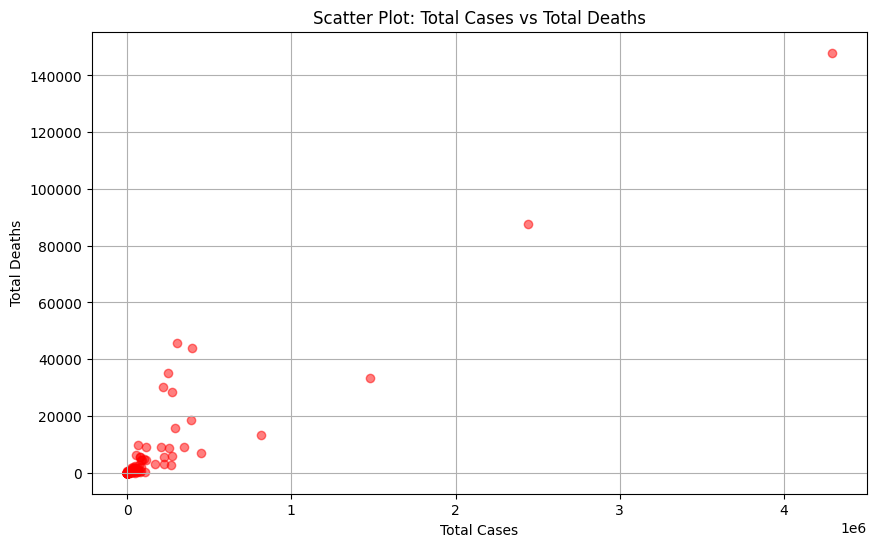

In [21]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Total_cases'], df['Deaths'], alpha=0.5, color='red')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.title('Scatter Plot: Total Cases vs Total Deaths')
plt.grid()
plt.show()


23. Save dataset in CSV format. 

In [23]:
# Save the cleaned dataset
cleaned_file_path = "covid_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

# Confirm file saved
cleaned_file_path


'covid_cleaned.csv'